# SIR using curve_fit
 ref: https://www.kaggle.com/c/covid19-global-forecasting-week-1/discussion/137796

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
import pandas as pd
df= pd.read_csv("active1-data-top-affected-countries.csv")
df["Country"].values

array(['China', 'Italy', 'Spain', 'Germany', 'Iran', 'US', 'France',
       'Korea, South', 'Switzerland', 'United Kingdom', 'Netherlands',
       'Austria', 'Belgium', 'Norway', 'Sweden', 'Denmark', 'Malaysia',
       'Portugal', 'Japan', 'Canada', 'Czechia', 'Brazil', 'Australia',
       'Cruise Ship', 'Israel', 'Ireland', 'Pakistan', 'Greece',
       'Luxembourg', 'Qatar', 'Finland', 'Chile', 'Poland', 'Iceland',
       'Singapore', 'Indonesia', 'Ecuador', 'Turkey', 'Saudi Arabia',
       'Slovenia', 'Thailand', 'Romania', 'Bahrain', 'Egypt', 'Estonia',
       'Russia', 'India', 'Peru', 'Philippines', 'Iraq', 'South Africa',
       'Mexico', 'Lebanon', 'Kuwait', 'San Marino',
       'United Arab Emirates', 'Panama', 'Slovakia', 'Armenia', 'Serbia',
       'Taiwan*', 'Argentina', 'Colombia'], dtype=object)

In [214]:
df.head()

,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,China,520,613,884,1367,2026,2819,5408,5967,8006,...,16749,15317,13986,13123,12260,11347,10621,9984,9448,9035
1,Italy,0,0,0,0,0,0,0,0,0,...,16221,19191,22412,25231,28565,31688,36595,42581,47506,52114
2,Spain,0,0,0,0,0,0,0,0,0,...,5039,5874,7281,9412,10720,12829,16856,18822,23249,26193
3,Germany,0,0,0,0,0,1,4,4,4,...,3629,4539,5749,7205,9190,12222,15207,19668,21980,24607
4,Iran,0,0,0,0,0,0,0,0,0,...,8405,9770,9348,10401,10780,11972,12697,12899,12975,13707


In [215]:
y_mat=df.values[:,1:]

In [216]:
df_pop=pd.read_csv("population_by_country_2020.csv")
df_pop.head()


,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1439323776,0.39%,5540090,153,9388211,-348399.0,1.7,38,61%,18.47%
1,India,1380004385,0.99%,13586631,464,2973190,-532687.0,2.2,28,35%,17.70%
2,United States,331002651,0.59%,1937734,36,9147420,954806.0,1.8,38,83%,4.25%
3,Indonesia,273523615,1.07%,2898047,151,1811570,-98955.0,2.3,30,56%,3.51%
4,Pakistan,220892340,2.00%,4327022,287,770880,-233379.0,3.6,23,35%,2.83%


In [217]:
def seir(y, x, R0, Tr, Tl):
    gamma=1./Tr
    beta=R0*gamma
    sigma=1./Tl
    sus = -beta*y[0]*y[2]/N
    expo = (beta*y[0]*y[2]/N)-sigma*y[1]
    infected = sigma*y[1] - gamma*y[2]
    reco = gamma*y[2]
    return sus, expo, infected, reco

def fit_ode(x,  R0, Tr, Tl):
    return integrate.odeint(seir, (sus0, exp0, inf0, rec0), x, args=( R0, Tr, Tl))[:,2]

In [225]:
def fit_country(country,population,bounds=([3,10,3], [20.01,12.01,7])):
    ydata= df[df["Country"]==country].values[0,1:]
    ydata = np.array(ydata, dtype=float)
    #xdata = np.array(xdata, dtype=float)
    idx=np.where(ydata>100)[0][0]
    ydata=ydata[idx:]
    xdata= np.arange(len(ydata)) #+ idx
#    xdata=xdata[idx:]
  
    #print(xdata,ydata)
    N = population
    inf0 = ydata[0]
    sus0 = N - inf0
    rec0 = 0.0
    exp0= inf0*5
    popt, pcov = optimize.curve_fit(fit_ode, xdata, ydata,bounds=bounds)
    fitted = fit_ode(xdata, *popt)
    plt.plot(xdata, ydata, 'o', mec = 'r')
    plt.plot(xdata, fitted,label=country)
    plt.legend()
    #plt.yscale("log")
    print(country, " R0 =  %3.3f \t" %popt[0], ", Tr = %3.3f \t "%popt[1], ", Tl = %3.3E" %popt[2])
   # print(pcov)
   # plt.title(country)



Italy  R0 =  4.532 	 , Tr = 12.010 	  , Tl = 3.000E+00
Germany  R0 =  8.052 	 , Tr = 12.010 	  , Tl = 6.037E+00
China  R0 =  9.161 	 , Tr = 0.005 	  , Tl = 1.400E+01
Korea, South  R0 =  1.007 	 , Tr = 0.045 	  , Tl = 2.073E-03
US  R0 =  9.833 	 , Tr = 10.000 	  , Tl = 7.000E+00
Iran  R0 =  2.469 	 , Tr = 13.135 	  , Tl = 2.313E-11


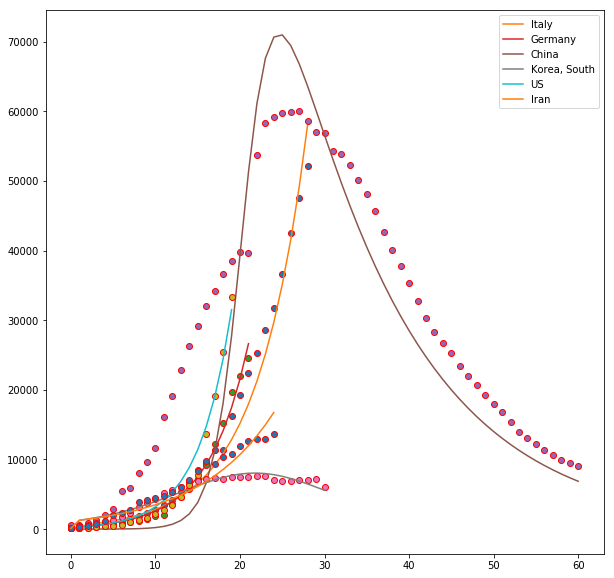

In [229]:
plt.figure(figsize=(10,10))
country='Italy'
population=df_pop[df_pop["Country (or dependency)"]=='Italy']["Population (2020)"].values[0] #'South Korea' #United States
fit_country(country,population)#bounds=([1,0,0],[15,30,15]))
country='Germany'
population=df_pop[df_pop["Country (or dependency)"]=='Germany']["Population (2020)"].values[0] #'South Korea' #United States
fit_country(country,population)#bounds=([1,0,0],[15,30,15]))
#country='China'
#population=df_pop[df_pop["Country (or dependency)"]=='China']["Population (2020)"].values[0] #'South Korea' #United States
#fit_country(country,population)#bounds=([1,0,0],[15,30,15]))
country='China'
population=df_pop[df_pop["Country (or dependency)"]=='China']["Population (2020)"].values[0] #'South Korea' #United States
fit_country(country,population,bounds=([0,0,0],[30,14,14]))
country='Korea, South'
#population=df_pop[df_pop["Country (or dependency)"]=='South Korea']["Population (2020)"].values[0] #'South Korea' #United States
#fit_country(country,population)#bounds=([1,0,0],[15,30,15]))
population=df_pop[df_pop["Country (or dependency)"]=='South Korea']["Population (2020)"].values[0] #'South Korea' #United States
fit_country(country,population,bounds=([0,0,0],[30,14,14]))
country='US'
population=df_pop[df_pop["Country (or dependency)"]=='United States']["Population (2020)"].values[0] #'South Korea' #United States
fit_country(country,population)#bounds=([1,0,0],[15,30,15]))
#country='Spain'
#population=df_pop[df_pop["Country (or dependency)"]=='Spain']["Population (2020)"].values[0] #'South Korea' #United States
#fit_country(country,population)#bounds=([1,0,0],[15,30,15]))
country='Iran'
population=df_pop[df_pop["Country (or dependency)"]=='Iran']["Population (2020)"].values[0] #'South Korea' #United States
fit_country(country,population,bounds=([0,0,0],[30,14,14]))
plt.savefig("fit.png")

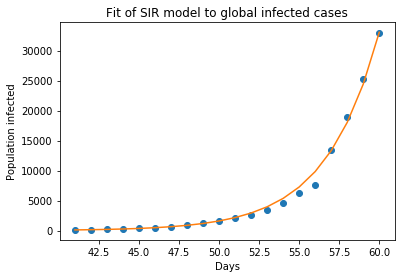

Optimal parameters: R0 = 1.5063449598137661  and Tr =  1.6696033745940468


In [212]:
def sir_model(y, x, R0, Tr):
    gamma=1./Tr
    beta=R0*gamma
    sus = -beta * y[0] * y[1] / N
    rec = gamma * y[1]
    inf = -(sus + rec)
    return sus, inf, rec

# r0= beta/gamma
# gamma = recovery rate= 1/Tr
#sigma = latency/incubation rate = 1/Tl

def fit_odeint(x, R0, Tr):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(R0, Tr))[:,1]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata,bounds=(0, [50,15]))
fitted = fit_odeint(xdata, *popt)

plt.plot(xdata, ydata, 'o')
plt.plot(xdata, fitted)
plt.title("Fit of SIR model to global infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: R0 =", popt[0], " and Tr = ", popt[1])

# SIER using minimising least square error
 ref: https://www.kaggle.com/anjum48/seir-model-with-intervention

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from pathlib import Path
#import os
#from tqdm.notebook import tqdm
from scipy.integrate import solve_ivp

def dS_dt(S, I, R_t, T_inf):
    return -(R_t / T_inf) * I * S

# Exposed equation
def dE_dt(S, E, I, R_t, T_inf, T_inc):
    return (R_t / T_inf) * I * S - (T_inc**-1) * E

# Infected equation
def dI_dt(I, E, T_inc, T_inf):
    return (T_inc**-1) * E - (T_inf**-1) * I

# Recovered/deceased equation
def dR_dt(I, T_inf):
    return (T_inf**-1) * I

def SEIR_model(t, y, R_t, T_inf, T_inc):
    
    if callable(R_t):
        reproduction = R_t(t)
    else:
        reproduction = R_t
    
    S, E, I, R = y
    S_out = dS_dt(S, I, reproduction, T_inf)
    E_out = dE_dt(S, E, I, reproduction, T_inf, T_inc)
    I_out = dI_dt(I, E, T_inc, T_inf)
    R_out = dR_dt(I, T_inf)
    return [S_out, E_out, I_out, R_out]

N = 100000  # Population size
n_infected = 1
max_days = 200

# State at time = 0 for SEIR model
a = (N - n_infected)/ N
b = 0
c = n_infected / N
d = 0.
T_inc = 5.2  # average incubation period
T_inf = 2.9  # average infectious period
R_0 = 2.2  # reproduction number without intervention
R_t = 0.7  # reproduction number after intervention
intervention_day = 80

def time_varying_reproduction(t):
    if t > intervention_day:
        return R_t
    else:
        return R_0

sol2 = solve_ivp(SEIR_model, [0, max_days], [a, b, c, d], args=(time_varying_reproduction, T_inf, T_inc), 
                t_eval=np.arange(max_days))

from scipy.optimize import minimize
from sklearn.metrics import mean_squared_log_error, mean_squared_error
